In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Geo Features

In [70]:
train_geo = pd.read_csv('../data/train_longlat.csv')
train_latlng = train_geo[['lat','lng']]
train_latlng.head()

,lat,lng
0,37.750648,-122.418316
1,37.784040,-122.419381
2,37.785660,-122.421476
3,37.788499,-122.421892
4,37.787084,-122.421757


In [71]:
park_geo = pd.read_csv('../data/parkingrecords.csv')[['lat','lon']]
park_latlng = pd.DataFrame({'lat':park_geo.lat, 'lng': park_geo.lon})
park_latlng = park_latlng.drop_duplicates()

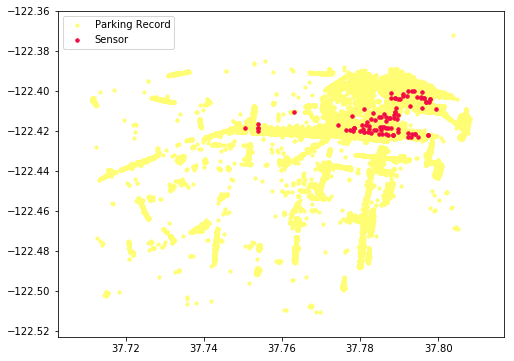

In [72]:
plt.figure(figsize = (8,6))
plt.scatter(park_latlng.lat,park_latlng.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])

In [73]:
train_latlng.describe()

,lat,lng
count,96.000000,96.000000
mean,37.785942,-122.413758
std,0.009961,0.007197
min,37.750648,-122.423180
25%,37.782333,-122.419683
50%,37.787795,-122.416725
75%,37.792295,-122.408122
max,37.799464,-122.399797


In [74]:
#Setting a limit to where we want to see these data
lat_min = 37.745
lat_max = 37.802
lng_min = -122.425
lng_max = -122.395

In [75]:
park_filter = park_latlng[(park_latlng.lat>=lat_min) & (park_latlng.lat <= lat_max) &(park_latlng.lng>=lng_min) & (park_latlng.lng <= lng_max)]

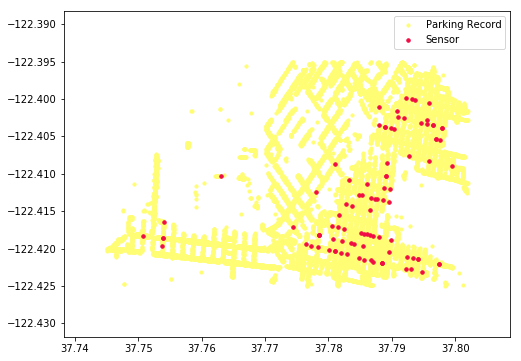

In [76]:
plt.figure(figsize = (8,6))
plt.scatter(park_filter.lat,park_filter.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])

### Get relevant parking record data

In [77]:
pr = pd.read_csv('../data/park_rec_dt_217.csv')
pr_filtered = pr[(pr.lat>=lat_min) & (pr.lat <= lat_max) &(pr.lon>=lng_min) & (pr.lon <= lng_max)]
pr_filtered.head()

,lat,lon,Date_Time,Minute,Hour,Dow,Time,isweekend
13,37.756761,-122.419010,2016-06-28 16:04:16,4,16,1,1604,0
14,37.758658,-122.418486,2016-06-28 17:04:59,4,17,1,1704,0
21,37.796008,-122.400311,2016-07-16 18:56:58,56,18,5,1856,0
22,37.768435,-122.414295,2016-07-18 08:59:07,59,8,0,859,1
37,37.781675,-122.401493,2016-09-11 12:05:08,5,12,6,1205,1


In [78]:
pr_unique = pr_filtered[['lat','lon']]
pr_unique = pr_unique.drop_duplicates()

In [79]:
pr_unique['pr_lat3'] = round(pr_unique['lat'],3)
pr_unique['pr_lng3'] = round(pr_unique['lon'],3)
pr_unique['pr_lat2'] = round(pr_unique['lat'],2)
pr_unique['pr_lng2'] = round(pr_unique['lon'],2)

In [80]:
train_ll = pd.read_csv('../data/train_longlat.csv')
train_ll['lat3'] = round(train_ll.lat,3)
train_ll['lng3'] = round(train_ll.lng,3)
train_ll['lat2'] = round(train_ll.lat,2)
train_ll['lng2'] = round(train_ll.lng,2)

In [81]:
pr_unique.head()

,lat,lon,pr_lat3,pr_lng3,pr_lat2,pr_lng2
13,37.756761,-122.419010,37.757,-122.419,37.76,-122.42
14,37.758658,-122.418486,37.759,-122.418,37.76,-122.42
21,37.796008,-122.400311,37.796,-122.400,37.80,-122.40
22,37.768435,-122.414295,37.768,-122.414,37.77,-122.41
37,37.781675,-122.401493,37.782,-122.401,37.78,-122.40


In [82]:
train_ll.head()

,Street,From,To,lat,lng,lat3,lng3,lat2,lng2
0,Mission Street,25th Street,26th Street,37.750648,-122.418316,37.751,-122.418,37.75,-122.42
1,Polk Street,Ellis Street,Olive Street,37.784040,-122.419381,37.784,-122.419,37.78,-122.42
2,Van Ness Avenue,Geary Boulevard,Myrtle Street,37.785660,-122.421476,37.786,-122.421,37.79,-122.42
3,Van Ness Avenue,Bush Street,Fern Street,37.788499,-122.421892,37.788,-122.422,37.79,-122.42
4,Van Ness Avenue,Daniel Burnham Court,Post Street,37.787084,-122.421757,37.787,-122.422,37.79,-122.42


In [83]:
park_train = pd.merge(pr_unique,train_ll, how = 'left', left_on=['pr_lat3','pr_lng3'], right_on=['lat3','lng3'])

In [84]:
park_train = park_train.dropna().drop_duplicates()

In [85]:
park_matched = pd.DataFrame({'lat':park_train.lat_x, 'lng': park_train.lon, 'Street':park_train.Street, 
                            'From':park_train.From,'To':park_train.To, 'S_lat': park_train.lat_y, 'S_lng': park_train.lng}) 

In [86]:
park_matched.head()

,From,S_lat,S_lng,Street,To,lat,lng
12,Van Ness Avenue,37.778279,-122.419829,Van Ness Avenue,Grove Street,37.778183,-122.420120
61,Washington Street,37.795880,-122.400531,Battery Street,Merchant Street,37.796448,-122.400551
117,Julia Street,37.778053,-122.412424,Mission Street,Angelo's Alley,37.778162,-122.412129
128,Mission Street,37.753846,-122.418619,23rd Street,Bartlett Street,37.753747,-122.419304
129,Mission Street,37.753846,-122.418619,23rd Street,Capp Street,37.753747,-122.419304


In [90]:
park_matched['dist'] = np.sqrt(abs(park_matched.S_lat - park_matched.lat)**2 + abs(park_matched.lng - park_matched.lng)**2)

In [91]:
park_matched

,From,S_lat,S_lng,Street,To,lat,lng,dist
12,Van Ness Avenue,37.778279,-122.419829,Van Ness Avenue,Grove Street,37.778183,-122.420120,0.000096
61,Washington Street,37.795880,-122.400531,Battery Street,Merchant Street,37.796448,-122.400551,0.000568
117,Julia Street,37.778053,-122.412424,Mission Street,Angelo's Alley,37.778162,-122.412129,0.000109
128,Mission Street,37.753846,-122.418619,23rd Street,Bartlett Street,37.753747,-122.419304,0.000099
129,Mission Street,37.753846,-122.418619,23rd Street,Capp Street,37.753747,-122.419304,0.000099
146,McAllister Street,37.780095,-122.420190,Van Ness Avenue,Van Ness Avenue,37.780199,-122.419951,0.000104
184,Jones Street,37.786743,-122.413182,Geary Street,Geary Street,37.786732,-122.412676,0.000011
185,Colin Place,37.787394,-122.413318,Jones Street,Geary Street,37.786732,-122.412676,0.000662
187,O'Farrell Street,37.784762,-122.421296,Van Ness Avenue,Alice B. Toklas Place,37.785250,-122.420866,0.000488
194,California Street,37.793224,-122.399989,Battery Street,Pine Street,37.792899,-122.399815,0.000325


In [92]:
m = park_matched.groupby(['lat','lng'])[['dist']].min().reset_index()

In [93]:
m2 = pd.merge(m, park_matched,how = 'left', left_on=['lat','lng','dist'], 
              right_on=['lat','lng','dist'])

In [94]:
selected_pr = m2.drop(['dist','S_lat','S_lng'],axis =1)

In [95]:
selected_pr_full = pd.merge(selected_pr,pr_filtered, how = 'left', left_on=['lat','lng'], right_on=['lat','lon'] )

In [598]:
selected_pr_full

,lat,lng,From,Street,To,lon,Date_Time,Minute,Hour,Dow,Time,isweekend
0,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 10:34:42,34,10,1,1034,0
1,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 07:46:03,46,7,1,746,0
2,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 06:49:23,49,6,1,649,0
3,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 06:32:55,32,6,1,632,0
4,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 05:19:48,19,5,1,519,0
5,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 05:02:12,2,5,1,502,0
6,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-31 02:36:01,36,2,1,236,0
7,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-30 10:53:16,53,10,0,1053,1
8,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-30 08:47:13,47,8,0,847,1
9,37.750524,-122.418185,25th Street,Mission Street,26th Street,-122.418185,2015-03-30 07:30:01,30,7,0,730,1


In [96]:
selected_pr_full.to_csv("../data/pr_streetmatch.csv", index = False)

## After filtering out irrelevant parking meters

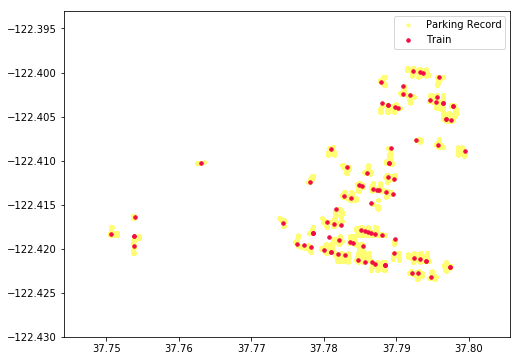

In [97]:
plt.figure(figsize = (8,6))
plt.scatter(selected_pr_full.lat,selected_pr_full.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Train'])

### Aggregate Parking data

In [98]:
park= pd.read_csv("../data/pr_streetmatch.csv",parse_dates=[6],infer_datetime_format= True)

In [99]:
park['Date'] =park.Date_Time.dt.date
#park['Street'] = park.Street.str.lower()
#park['From'] = park.From.str.lower()
#park['To'] = park.To.str.lower()

In [100]:
park['From_To'] = park['From'] + '_' + park['To']

In [101]:
daily = park.groupby(['Street','From_To','Date']).size().reset_index()

In [102]:
daily_avg = daily.groupby(['Street','From_To'])[0].mean().reset_index()

In [103]:
# average of number of parkings daily
daily_avg.head()

,Street,From_To,0
0,23rd Street,Bartlett Street_Valencia Street,22.954545
1,23rd Street,Mission Street_Bartlett Street,144.409091
2,23rd Street,Mission Street_Capp Street,144.409091
3,23rd Street,South Van Ness Avenue_Capp Street,20.952381
4,Battery Street,California Street_Pine Street,54.523810


In [104]:
hour = park.groupby(['Street','From_To','Date','Hour']).size().reset_index()

In [105]:
hour.head()

,Street,From_To,Date,Hour,0
0,23rd Street,Bartlett Street_Valencia Street,2015-03-10,2,2
1,23rd Street,Bartlett Street_Valencia Street,2015-03-10,3,3
2,23rd Street,Bartlett Street_Valencia Street,2015-03-10,4,1
3,23rd Street,Bartlett Street_Valencia Street,2015-03-10,5,3
4,23rd Street,Bartlett Street_Valencia Street,2015-03-10,6,1


In [106]:
hour_avg = hour.groupby(['Street','From_To','Date'])[0].mean().reset_index()
hourly = hour_avg.groupby(['Street','From_To'])[0].mean().reset_index()
hourly

,Street,From_To,0
0,23rd Street,Bartlett Street_Valencia Street,2.887861
1,23rd Street,Mission Street_Bartlett Street,13.282188
2,23rd Street,Mission Street_Capp Street,13.282188
3,23rd Street,South Van Ness Avenue_Capp Street,2.572846
4,Battery Street,California Street_Pine Street,5.023663
5,Battery Street,Halleck Street_California Street,4.621744
6,Battery Street,Washington Street_Merchant Street,5.271331
7,Bryant Street,Mariposa Street_17th Street,3.433214
8,Bush Street,Parking Entrance Lane_Chatham Place,2.323099
9,Bush Street,Taylor Street_Mason Street,3.525239


In [107]:
weekend = park.groupby(['Street','From_To','Date','isweekend']).size().reset_index()

In [108]:
weekend_avg = weekend.groupby(['Street','From_To','isweekend'])[0].mean().reset_index()

In [109]:
weekend_avg.head()

,Street,From_To,isweekend,0
0,23rd Street,Bartlett Street_Valencia Street,0,26.812500
1,23rd Street,Bartlett Street_Valencia Street,1,12.666667
2,23rd Street,Mission Street_Bartlett Street,0,168.812500
3,23rd Street,Mission Street_Bartlett Street,1,79.333333
4,23rd Street,Mission Street_Capp Street,0,168.812500


In [110]:
dow = park.groupby(['Street','From_To','Date','Dow','Hour']).size().reset_index()
dow_avg = dow.groupby(['Street','From_To','Dow'])[0].mean().reset_index()
dow_avg

,Street,From_To,Dow,0
0,23rd Street,Bartlett Street_Valencia Street,0,2.608696
1,23rd Street,Bartlett Street_Valencia Street,1,2.800000
2,23rd Street,Bartlett Street_Valencia Street,2,2.916667
3,23rd Street,Bartlett Street_Valencia Street,3,2.840000
4,23rd Street,Bartlett Street_Valencia Street,4,3.120000
5,23rd Street,Bartlett Street_Valencia Street,5,4.500000
6,23rd Street,Bartlett Street_Valencia Street,6,1.454545
7,23rd Street,Mission Street_Bartlett Street,0,13.666667
8,23rd Street,Mission Street_Bartlett Street,1,13.127660
9,23rd Street,Mission Street_Bartlett Street,2,15.281250


In [111]:
def day_type(x):
    if x == 6 or x == 0:
        return 1
    else:
        return 0

In [112]:
train = pd.read_csv('../data/train-parking.csv', parse_dates=[[3,4]], infer_datetime_format=True)
train['Minute'] = train.Date_Time.dt.minute
train['Hour'] = train.Date_Time.dt.hour
train['Dow'] = train.Date_Time.dt.weekday
train['Time'] = train["Hour"]*100 + train['Minute']
train['isweekend'] = train['Dow'].apply(day_type)
train['From_To'] = train['From'] + '_' + train['To']

In [113]:
test=pd.read_csv('../data/test-no-label-parking.csv', parse_dates=[[3,4]], infer_datetime_format=True)
test['Minute'] = test.Date_Time.dt.minute
test['Hour'] = test.Date_Time.dt.hour
test['Dow'] = test.Date_Time.dt.weekday
test['Time'] = test["Hour"]*100 + test['Minute']
test['isweekend'] = test['Dow'].apply(day_type)
test['From_To'] = test['From'] + '_' + test['To']

### Join computed frequencies back to train and test data

In [114]:
train['hour_avg_freq'] = pd.merge(train.copy(),hourly, how = 'left',left_on=['Street','From_To'], right_on=['Street','From_To'])[0]

test['hour_avg_freq'] = pd.merge(test.copy(),hourly, how = 'left',left_on=['Street','From_To'], right_on=['Street','From_To'])[0]

In [115]:
train[train['hour_avg_freq'].isnull()]
test[test['hour_avg_freq'].isnull()]

,Date_Time,Street,From,To,Street.Length,Minute,Hour,Dow,Time,isweekend,From_To,hour_avg_freq
26,2014-03-28 19:16:00,Jones Street,Bush Street,Sutter Street,105.07395,16,19,4,1916,0,Bush Street_Sutter Street,NaN
27,2014-03-28 22:01:00,Jones Street,Bush Street,Sutter Street,105.07395,1,22,4,2201,0,Bush Street_Sutter Street,NaN
121,2014-03-29 20:10:00,Jones Street,Bush Street,Sutter Street,105.07395,10,20,5,2010,0,Bush Street_Sutter Street,NaN
279,2014-04-09 14:47:00,Jones Street,Bush Street,Sutter Street,105.07395,47,14,2,1447,0,Bush Street_Sutter Street,NaN
365,2015-11-25 20:32:00,Jones Street,Bush Street,Sutter Street,105.07395,32,20,2,2032,0,Bush Street_Sutter Street,NaN
424,2016-07-29 11:42:00,Jones Street,Bush Street,Sutter Street,105.07395,42,11,4,1142,0,Bush Street_Sutter Street,NaN
542,2016-08-21 09:59:00,Jones Street,Bush Street,Sutter Street,105.07395,59,9,6,959,1,Bush Street_Sutter Street,NaN
604,2016-10-14 08:45:00,Jones Street,Bush Street,Sutter Street,105.07395,45,8,4,845,0,Bush Street_Sutter Street,NaN
721,2016-11-04 20:52:00,Jones Street,Bush Street,Sutter Street,105.07395,52,20,4,2052,0,Bush Street_Sutter Street,NaN


In [49]:
streetmean = train[train['Street']=='Jones Street'].hour_avg_freq.mean()

In [50]:
train['hour_avg_freq'] = train['hour_avg_freq'].fillna(streetmean)
test['hour_avg_freq'] = test['hour_avg_freq'].fillna(streetmean)

In [63]:
train['dow_avg_freq'] = pd.merge(train.copy(),dow_avg, how = 'left',left_on=['Street','From_To','Dow'], right_on=['Street','From_To','Dow'])[0]
train['dow_avg_freq']= train['dow_avg_freq'].fillna(train['hour_avg_freq'])

In [64]:
test['dow_avg_freq'] = pd.merge(test.copy(),dow_avg, how = 'left',left_on=['Street','From_To','Dow'], right_on=['Street','From_To','Dow'])[0]
test['dow_avg_freq']= test['dow_avg_freq'].fillna(test['hour_avg_freq'])

In [65]:
to_join_test = test[['Date_Time','Street','From','To','hour_avg_freq','dow_avg_freq']]
to_join_test.to_csv('../data/park_tojoin_test.csv', index = False)

In [66]:
to_join = train[['Date_Time','Street','From','To','hour_avg_freq','dow_avg_freq']]

In [67]:
to_join.to_csv('../data/park_tojoin.csv', index = False)